___
[Home- go back to hadardestani.com](http://hadiardestani.com/)
___
# Decision Trees-Lending club Data

A few years ago I borrowed some money from Lending club while I was in school and needed some money. I was very happy with the process and how fast everything worked out. And of course, I paid it off to the last penny. But this is not always the case. Some people fault on their loans. How does lending club trust you to borrow money? Of course, they use their past Data, consumer Data, and statistics to determine what is the probability of a potential borrower to pay back in full, and based on their formula they approve or reject the request. I will try to download publically available data from their website and try to create a model that will help predict whether if a potential borrower will pay back in full or not. 

I will be using their data from 2007-2010 and try to classify and predict whether or not the borrower paid back their loan in full. I downloaded the data from [here](https://www.lendingclub.com/info/download-data.action) (of course I had a username and password since I once was a browser so I just had to reset my password. I am attaching the cleaned data in CSV format.

# Libraries

***Let's first import the usual libraries for perfroming an EDA.***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

***I am going to use pandas to import my previously cleaned CSV file***

In [2]:
lending_club = pd.read_csv('lending_club_data.csv')

***let's check the data***

In [3]:
lending_club.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


*** now lets see what these attributes means.There is a Data Dictionary in excel format available on their website that can be downloaded as well.  

* credit.policy: if the customer meets the credit underwriting criteria of LendingClub.com the 1, and otherwise 0.
* purpose: The purpose of the loan.
* int.rate: The interest rate of the loan (example: rate of 11% would be shown as 0.11). of course risker borrowers have a higher rate.
* installment: The monthly installments to be paid back.
* log.annual.inc: The annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt / annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line (history).
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths:  the number of inquiries in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [4]:
lending_club.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
lending_club.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis /  Data Visualization

For that I want to first see the distribuion of brrower's FICO credit scores by whether if the borrower passed lending clubs credit policy criteria or not (1 or 0). 

Text(0.5, 0, 'FICO')

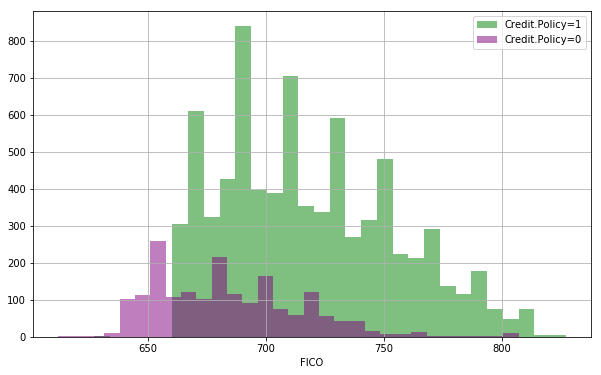

In [6]:
plt.figure(figsize=(10,6))
lending_club[lending_club['credit.policy']==1]['fico'].hist(alpha=0.5,color='green',
                                              bins=30,label='Credit.Policy=1')
lending_club[lending_club['credit.policy']==0]['fico'].hist(alpha=0.5,color='purple',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

***it appears that peopel with credit score of lower than 660 don't meet the credit policy creteria of lending club***

Now let's see the same thing but this time by whether if the fully paid or not

Text(0.5, 0, 'FICO')

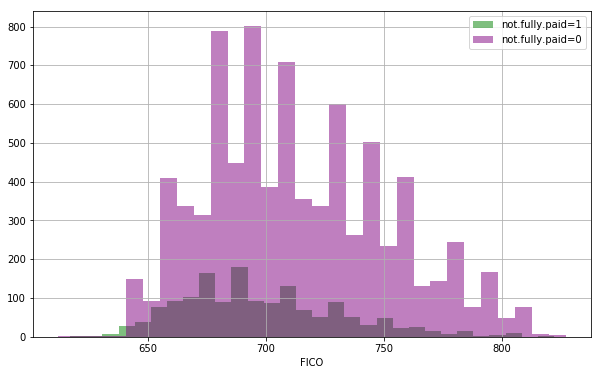

In [7]:
plt.figure(figsize=(10,6))
lending_club[lending_club['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='green',
                                              bins=30,label='not.fully.paid=1')
lending_club[lending_club['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='purple',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

***It appears that the majority of barrowers paying off their loans***


***From the Dataset, there are 7 diffirent types of loans purpose.***

In [8]:
lending_club.groupby("purpose")['purpose'].count()

purpose
all_other             2331
credit_card           1262
debt_consolidation    3957
educational            343
home_improvement       629
major_purchase         437
small_business         619
Name: purpose, dtype: int64

***Now let's see their distributions based on the fact that they fully paid or not.***

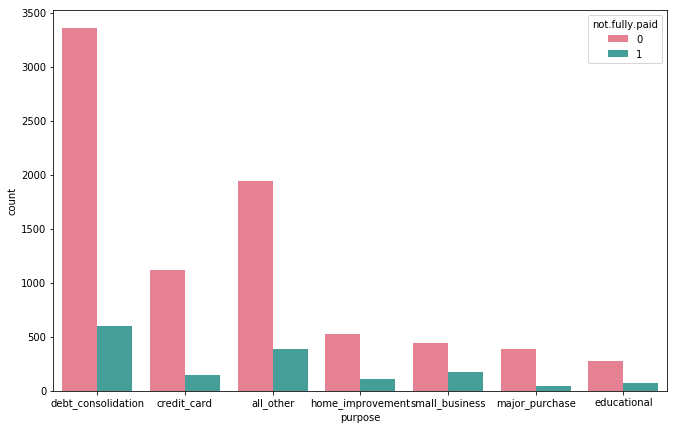

In [9]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=lending_club,palette='husl')

***Earlier we mentioned that if credit score is lower then we will see higher interest rate. Lets look into the relationship between FICO score and Lending club interest rate***

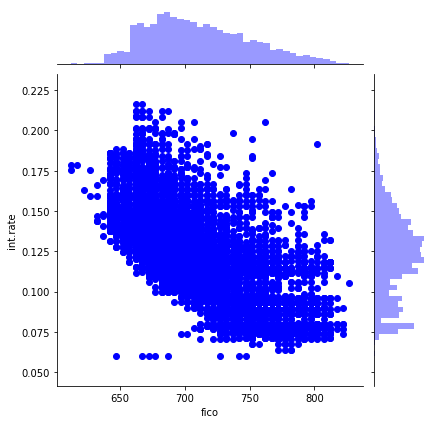

In [10]:
sns.jointplot(x='fico',y='int.rate',data=lending_club,color='blue')
# Below just confirmes that as Fico score increases the interset ratio rate decreses

**Now Lets see things in another way. Let's look at the loan approvals (credit policy) by fully paid or not fully paid and their interest rate based on their FICO score. Trying to do all the above figures in one. I am going to break it down a bit. step 1 and then step 2 which is what I want to see.**

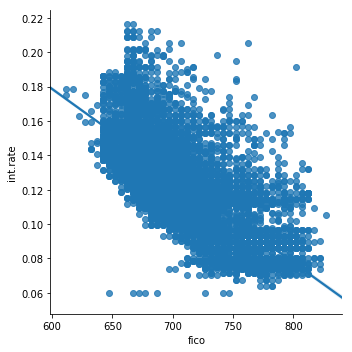

In [11]:
#step 1 
sns.lmplot(y='int.rate',x='fico',data=lending_club)

<Figure size 792x504 with 0 Axes>

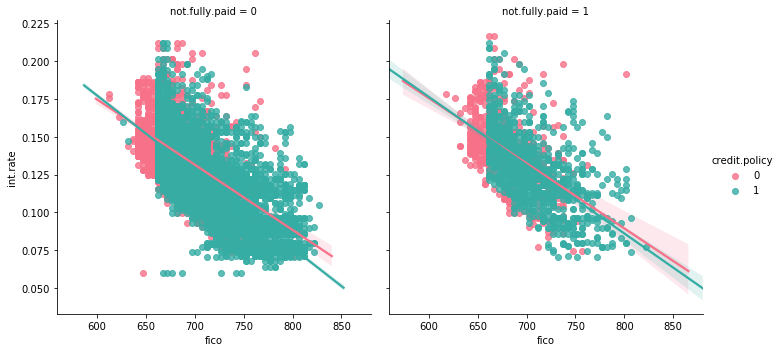

In [12]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=lending_club,hue='credit.policy',
           col='not.fully.paid',palette='husl')  #  col= will split the figure into two column

# Random Forest Classification Model

I wanna Check the data first.

In [13]:
lending_club.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Feature Engineering

In the above results we can see that the purpose column has a data type "object" meaning that it is a categorical data type. sklearn won't unsdrestand categorical data, therfore we will need to change/transform it. I am going to achive this by using dummy variables. Here is how I do it:

In [16]:
#step 1
purpose_fix = ['purpose']

In [17]:
#step 2
Fixed = pd.get_dummies(lending_club,columns=purpose_fix,drop_first=True)

In [18]:
Fixed.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [19]:
Fixed.info()
# we can see that the data in purpose is split into its componenats with a non categorigal data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

## Setting up the Train and Test Data

I am going to use train_test_split from sklearn to split my data into a train and a test data set.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = Fixed.drop('not.fully.paid',axis=1)# X= everything except our target (the one that we are trying to predict)
y = Fixed['not.fully.paid']# y= the one that we are trying to predict the ones that did not fully paid
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training The Model
I mam going to first train a Decision Tree model and then a Random Forest model and then compare them

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dtree = DecisionTreeClassifier()

In [24]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation

In [25]:
predictions = dtree.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,predictions))
print ('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2431
           1       0.20      0.25      0.22       443

   micro avg       0.73      0.73      0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



[[1977  454]
 [ 333  110]]


## Training the Random Forest model

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc = RandomForestClassifier(n_estimators=3)

In [30]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation

In [31]:
predictions = rfc.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2431
           1       0.23      0.16      0.19       443

   micro avg       0.79      0.79      0.79      2874
   macro avg       0.54      0.53      0.53      2874
weighted avg       0.76      0.79      0.77      2874



[[2190  241]
 [ 371   72]]


# Comparison
which one is a better model?
Well, it depends on the metric that we are trying to optimize our model for. Notice the recall for each class for the models. Neither of them did very well, so I think more feature engineering is needed.